# ROI Stand Alone Service

# 0. Imports

1. Verander **git_dir** in de map op jouw computer met de code. <br>
2. Run vervolgens de cell door met de **Run** knop bovenin het scherm of door **ctrl+enter** te drukken. <br>
Het bolletje rechts boven geeft aan of het notebook bezig is (naast Python 3 (ipykernel)). Als deze zwart gekleurd is, dan is het notebook bezig.<br>
Als er "Imports are succesfull!" onder de cell komt te staan na het uitvoeren, dan is deze cell succesvol uitgevoerd. <br>

In [1]:
import os
import sys
import numpy as np
import shutil
%load_ext autoreload
%autoreload 2

# insert the directory where you extracted the zip file here:
git_dir = r"C:\Werk\Projecten\P1414_ROI\Github_P1414\P1414"

sys.path.append(os.path.join(git_dir, 'Code'))
sys.path.append(os.path.join(git_dir, 'HydroLogic_Inundation_toolbox'))
sys.path.append(os.path.join(git_dir, 'HydroLogic_Inundation_toolbox/Readers'))

from notebooks.background_scripting.v1.test_connection import TestConnection
test_connection = TestConnection()

Imports are succesfull!


# 1. Model specifications 

## 1.1. Select basemodel
De widgets zijn alleen te zien als je het notebook zelf runt! In de documentatie zijn deze niet zichtbaar. <br>
1. Run de cell hieronder.<br>
2. Vul in de widget "path to folder with models" de map in waarin de gedownloade modellen staan. <br>
3. Vervolgens klik je update settings en kan je een model selecteren in de lijst. <br>
4. Je kan het scenario dat je wil door rekenen ook een naam geven, door deze in te vullen bij "Scenario name". <br>
5. Ten slotte klik je wederom op update settings.

In [3]:
from notebooks.background_scripting.v1.select_basemodel import ModelSettings

model_settings = ModelSettings(git_dir)
model_settings.display_widgets()

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'Model settings are:'

{
    "folder": "C:\\Werk\\Projecten\\P1414_ROI\\Cursus-08-05\\StandAloneService\\Model_database",
    "model": "model_cursus",
    "scenario_name": "run"
}


## 1.2. Model settings
1. Run de cell hieronder.<br>
2. Kies de start- en stoptijd van het model. <br>
3. Kies de interval om resultaten weg te schrijven bij "Interval to write map file". <br>
4. Vul de locatie in van het D-HYDRO script _run_dimr.bat_. Dit scripts is te vinden in de map van je D-HYDRO installatie. De map is waarschijnlijk vergelijkbaar aan de standaard waarde in de widget "Location of dhydro run_dimr". <br>
5. Klik op "Update settings <br>

In [4]:
from notebooks.background_scripting.v1.modify_mdu import ModifyMDU, copy_model

model_path = copy_model(os.path.join(model_settings.settings['folder'], model_settings.settings['model']), model_settings.settings['scenario_name'])
modify_mdu = ModifyMDU(model_path)
modify_mdu.display_widgets()

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'MDU settings are:'

{
    "tStart": 0.0,
    "tStop": 12.0,
    "mapInterval": 20.0,
    "DHYDRO location": "C:\\Program Files\\Deltares\\D-HYDRO Suite 2023.01 1D2D\\plugins\\DeltaShell.Dimr\\kernels\\x64\\dimr\\scripts\\run_dimr.bat"
}


## 1.3.1. Dambreak location manual
Kies hieronder zelf een dambreak locatie. <br>
1. Run de cell hieronder.<br>
2. Kies de locatie van je damdoorbraak. Het kan even duren voordat alle dammen zichtbaar zijn. <br>
3. Kies het bovenstroomse punt (punt in watergang) voor het water door damdoorbraak stroomt. <br>
4. Kies het benedenstroomse punt (grid cell) waar het water naar toe stroomt. <br>
5. Bekijk je geselecteerde locatie. Als je niet tevereden bent, run deze cell dan opnieuw.

In [5]:
from notebooks.background_scripting.v1.modify_dambreak_v2 import DambreakWidget

use_template = False
dambreakWidget = DambreakWidget(model_path)
dambreakWidget.draw_map()

Map(center=[51.96923070026092, 4.63966860152552], controls=(ZoomControl(options=['position', 'zoom_in_text', '…

HTML(value='<b style="color:black;font-size:18px;">Done! Inspect your results (4/4) </b>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xdc\x00\x00\x03\x84\x08\x03\x00\x00\x00\x8c\xe6\…

## 1.3.2. Dambreak location from template
Kies hieronder een voorbereide Dambreak. <br>
1. Run de cell hieronder.<br>
2. Zet de marker op een locatie. <br>
3. Klik op "update settings". <br>

In [6]:
from notebooks.background_scripting.v1.modify_dambreak_v2 import UseTemplateDambreak

use_template = True
dambreak_template = UseTemplateDambreak(model_path)
dambreak_template.draw_map()

Map(center=[51.90698, 4.74042], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

Button(description='Confirm location', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_col…

Output()

HTML(value='<b style="color:black;font-size:18px;"></b>')

## 1.4. Dambreak settings
Specificeer de parameters van de Dambreak <br>
1. Run de cell hieronder.<br>
2. Vul alle velden in met de waardes die je wil.<br>
3. Klik op "update settings". 

In [7]:
from notebooks.background_scripting.v1.modify_dambreak_v2 import ModifyDambreak

if use_template == False:
    print("using the manually selected dike breach")
    add_dambreak = ModifyDambreak(model_path, dambreakWidget.settings, dambreakWidget.keringen, False, None)
else:
    print("using the dike breach from a template")
    add_dambreak = ModifyDambreak(model_path, None, None, True, dambreak_template.kering_choice)
add_dambreak.display_widgets()

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'Dambreak settings are:'

{
    "crestLevelIni": 0.0,
    "t0": 0.0,
    "crestLevelMin": -2.0,
    "breachWidthIni": 5.0,
    "f1": 1.3,
    "f2": 0.04,
    "uCrit": 0.2
}


## 1.5. Boundary conditions
Specificeer de randvoorwaarden van het model. <br>
1. Run de cell hieronder.<br>
2. Voer het waterlevel in de Noordzee in. <br>
3. Voer het waterlevel in het Markermeer in. <br>
4. Bepaal de afvoergolf in de Rijn, door de parameters aan te passen.<br>
5. Klik op "update settings", je ziet dan de huidige instellingen. Je kan dingen nu verder aanpassen, en opnieuw op "update settings" klikken, totdat je tevreden bent.


Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'Boundary conditions are:'

{
    "Waterlevel North Sea": 0.0,
    "Waterlevel Markermeer": 0.0,
    "Rhine basic discharge": 5000.0,
    "Rhine peak discharge": 15000.0,
    "Rhine event start (hour)": 0.0,
    "Rhine event duration (hours)": 24.0
}


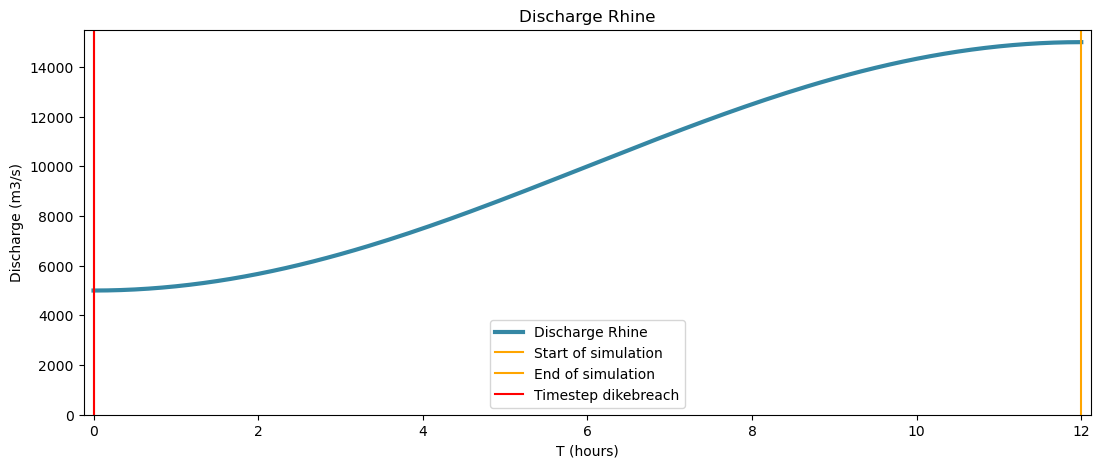

In [8]:
from notebooks.background_scripting.v1.modify_boundaries import ModifyBoundaries, ModifyRhineDischarge

modify_boundaries = ModifyBoundaries(model_path, modify_mdu.settings, add_dambreak.dambreak_settings)
modify_boundaries.display_widgets()

# 2. Run Model
Voer een simulatie uit. <br>
1. Run de cell hieronder. <br>
2. Klik op "Run model" <br>
3. Het model begint nu. Eerst moet het model initialiseren, dit kan een tijdje duren. Hierna zal het progressie balkje vol lopen. 

In [ ]:
from notebooks.background_scripting.v1.model_runner import ModelRunner

model_runner = ModelRunner(model_path)
model_runner.display_widgets()

# 3. Post processing

## 3.1. Plot map
Visualiseer de resultaten op kaart. <br>
1. Run de cell hieronder.<br>
2. Voer de gewenste parameters in voor de plot. <br>
3. Klik op "Plot map". De eerste plot duurt iets langer.<br>
Indien je een ander model wil bekijken dan je hebt doorgerekend (of als je niks wil doorrekenen), dan kan je dat doen door in de cell hieronder een nieuw model_path toe te voegen. Voeg de volgende lijn toe: <br>
_model_path = r"PATH_TO_MODEL"_

Button(description='Plot map', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_color='#358…

Output()

'Plot settings are:'

{
    "aggregation_type": "timestep",
    "color_map": "viridis",
    "max_value_legend": 1.0,
    "mesh_resolution": 200.0,
    "min_value_legend": 0.0,
    "output_file_path": "C:\\Werk\\Projecten\\P1414_ROI\\Cursus-08-05\\StandAloneService\\Model_runs\\model_cursus_2023-05-17T15-01-24_run\\dflowfm\\output\\post_processing",
    "plot_variable": "Mesh2d_waterdepth",
    "timestep": 48.0
}


HTML(value='<p>Generating plot... (first plot can take a while)</p>')

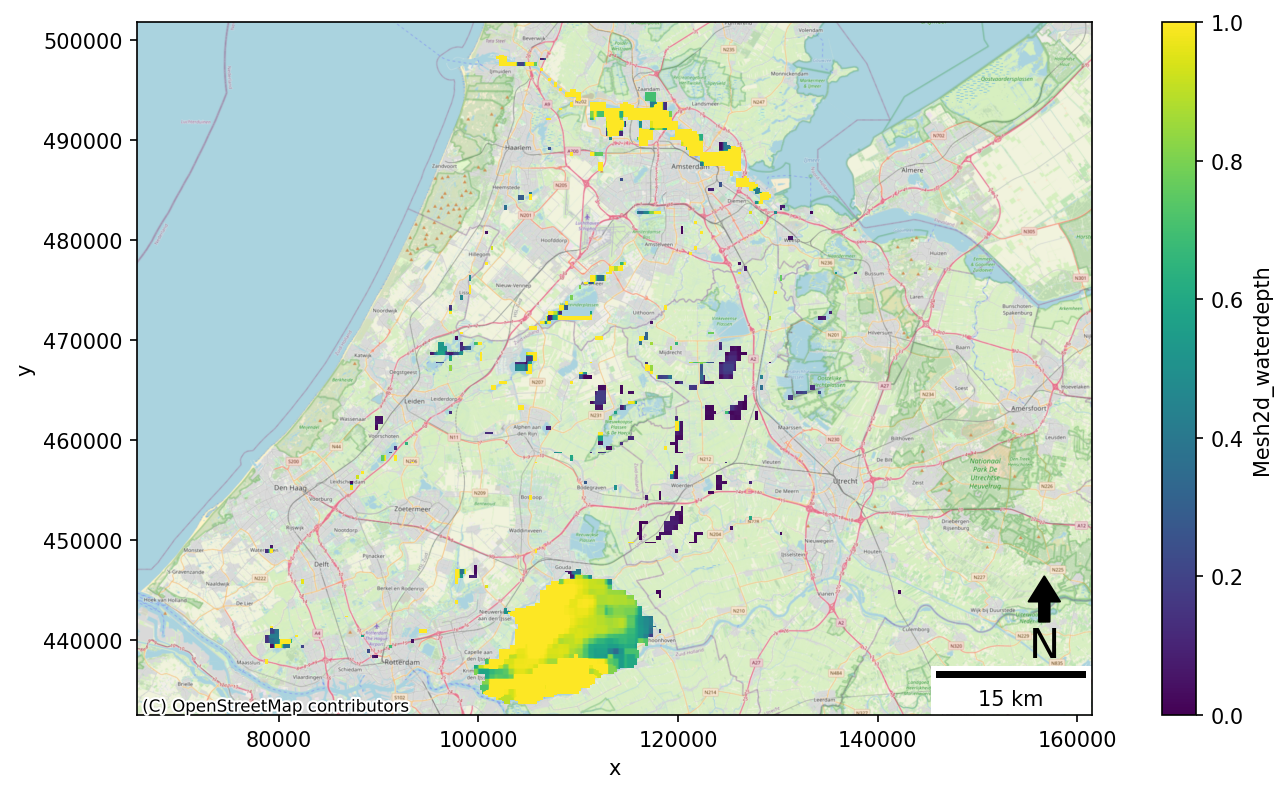

In [10]:
from notebooks.background_scripting.v1.post_processing import PlotSettingsMap, MapPlotter

plot_settings = PlotSettingsMap(model_path)
plot_settings.display_widgets()

## 3.2. Plot dambreak
Maak grafieken van de dambreak variabelen.

1. Run de cell hieronder.<br>
2. Voer de gewenste parameters in voor de plot. <br>
3. Klik op "Plot breach information".<br>
Indien je een ander model wil bekijken dan je hebt doorgerekend (of als je niks wil doorrekenen), dan kan je dat doen door in de cell hieronder een nieuw model_path toe te voegen. Voeg de volgende lijn toe: <br>
_model_path = r"PATH_TO_MODEL"_

Button(description='Plot breach information', layout=Layout(height='35px', width='99%'), style=ButtonStyle(but…

Output()

'Plot settings are:'

{
    "his_path": "C:\\Werk\\Projecten\\P1414_ROI\\Cursus-08-05\\StandAloneService\\Model_runs\\model_cursus_2023-05-17T15-01-24_run\\dflowfm\\output\\DFM_his.nc",
    "output_file_path": "C:\\Werk\\Projecten\\P1414_ROI\\Cursus-08-05\\StandAloneService\\Model_runs\\model_cursus_2023-05-17T15-01-24_run\\dflowfm\\output\\post_processing",
    "plot_variables": [
        "dambreak_discharge",
        "dambreak_cumulative_discharge"
    ]
}


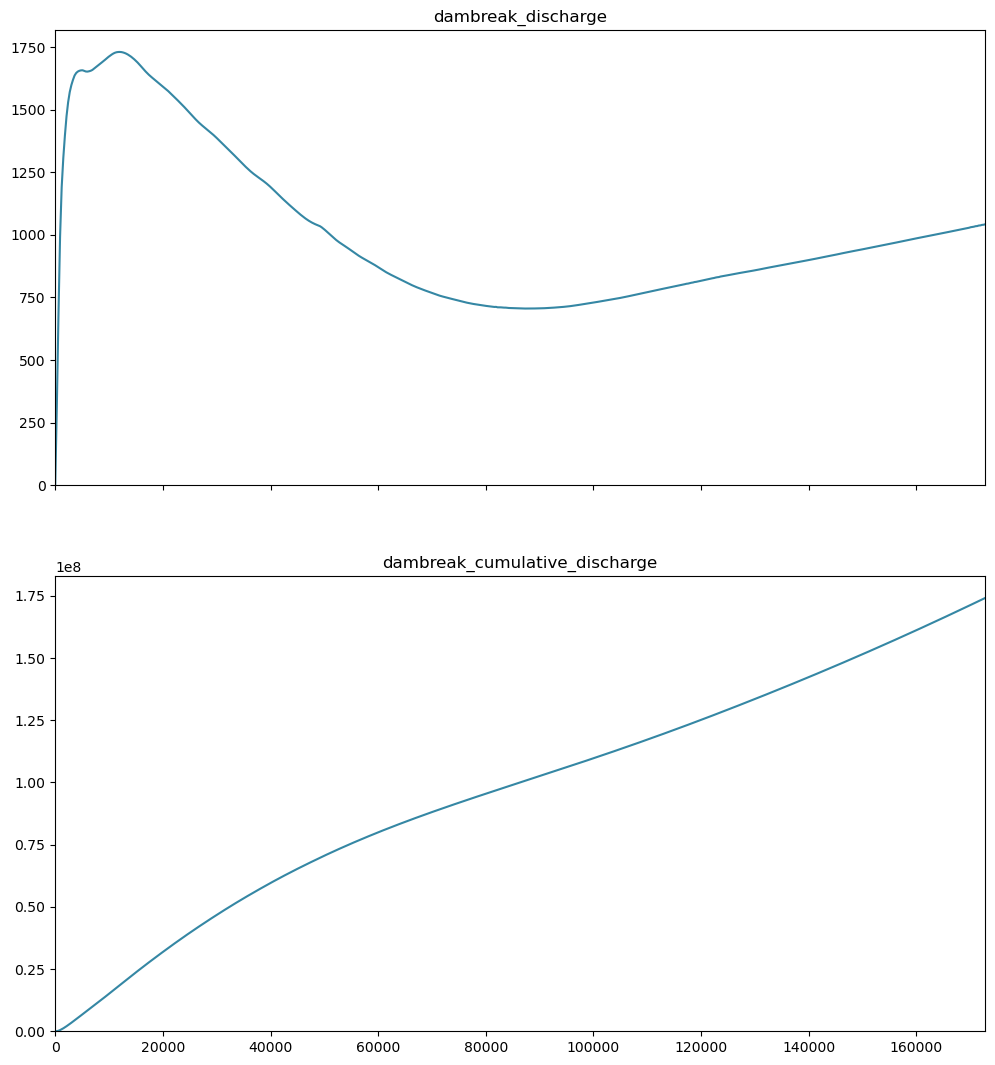

In [11]:
from notebooks.background_scripting.v1.post_processing import PlotSettingsBreach, BreachPlotter

plot_settings = PlotSettingsBreach(model_path)
plot_settings.display_widgets()